In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
train_df = pd.read_csv("/content/fashion-mnist_train.csv")
test_df = pd.read_csv("/content/fashion-mnist_test.csv")

In [59]:
train_df.shape

(60000, 785)

In [60]:
training = np.array(train_df)
testing = np.array(test_df)

2


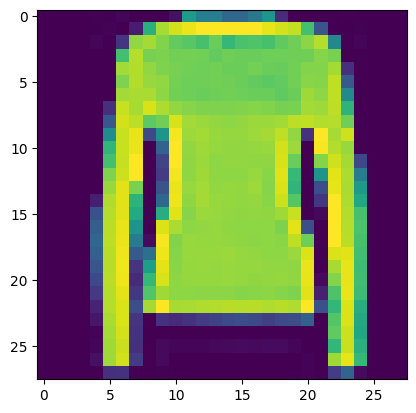

In [61]:
import random

r = random.randint(0,60000)

print(training[r,0])
plt.imshow(training[r,1:].reshape(28,28))


In [64]:
x_train = training[:,1:]/255
y_train = training[:,0]
x_test = testing[:,1:]/255
y_test = testing[:,0]


In [67]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.2)

In [70]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))
x_val = x_val.reshape(x_val.reshape[0],*(28,28,1))

TypeError: 'builtin_function_or_method' object is not subscriptable

In [71]:
import keras

In [72]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [73]:
model = Sequential()

In [74]:
model.add(Conv2D(32,1,1,input_shape=(28,28,1),activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [76]:
model.add(Flatten())

In [77]:
model.add(Dense(10,activation='relu'))

In [78]:
model.add(Dense(10,activation='sigmoid'))

In [79]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [80]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.6372 - loss: 1.0550 - val_accuracy: 0.7934 - val_loss: 0.5749
Epoch 2/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7876 - loss: 0.5896 - val_accuracy: 0.7889 - val_loss: 0.5749
Epoch 3/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8029 - loss: 0.5446 - val_accuracy: 0.7892 - val_loss: 0.5836
Epoch 4/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8038 - loss: 0.5438 - val_accuracy: 0.8017 - val_loss: 0.5542
Epoch 5/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8123 - loss: 0.5246 - val_accuracy: 0.8097 - val_loss: 0.5381
Epoch 6/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8106 - loss: 0.5231 - val_accuracy: 0.8057 - val_loss: 0.5337
Epoch 7/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8162 - loss: 0.5137 - val_accuracy: 0.8075 - val_loss: 0.5434
Epoch 8/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8147 -

In [85]:
model.evaluate(x_test,y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8541 - loss: 0.4041


0.8597999811172485